## Bayesian Analysis of 2020 Bundesliga Results

In [1]:
library("rstan")
library("parallel")

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [2]:
# example(stan_model, package = "rstan", run.dontrun = TRUE)

In [3]:
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

In [4]:
getwd()

[1] "/mnt/d/Github/Stan/Stan/Jupyter"

In [5]:
setwd("/mnt/d/Github/Stan/Stan")
remove(list = ls()) # clear the current work space

In [6]:
HFA <- readRDS(file = paste(getwd(),
    "/Data/Sorted_Bundesliga_2019_20.rds", sep = ""))

In [7]:
ngames <- nrow(HFA)
ngames

nteams <- length(unique(HFA$host))
nteams

HFA$COVID + 1

dl <- list(
  G = ngames,
  yh = HFA$HG,
  yv = HFA$VG,
  COV = HFA$COVID + 1,
  xh = HFA$host,
  xv = HFA$visitor,
  T = nteams
)

[1] 306

[1] 18

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2

In [8]:
remove(sm)
sm <- stan_model(paste(getwd(), "/Models/Bundesliga2020.stan", sep = ""))

Warning message in remove(sm):
“object 'sm' not found”
recompiling to avoid crashing R session



In [9]:
# fit <- stan(
#   file = paste(getwd(), "/Models/Bundesliga2020.stan", sep = ""),  # Stan program
#   data = dl,    # named list of data
#   chains = 4,             # number of Markov chains
#   warmup = 1000,          # number of warmup iterations per chain
#   iter = 2000,            # total number of iterations per chain
#   cores = 2,              # number of cores (could use one per chain)
#   refresh = 1             # no progress shown
#   )

In [10]:
remove(fit)
fit <- sampling(object = sm,
                data = dl,
                init = "random",
                control = list(adapt_delta = 0.95),
                chains = 4,
                iter = 2000,
                warmup = 1500,
                thin = 1,
                verbose = TRUE)

Warning message in remove(fit):
“object 'fit' not found”



CHECKING DATA AND PREPROCESSING FOR MODEL 'Bundesliga2020' NOW.

COMPILING MODEL 'Bundesliga2020' NOW.

STARTING SAMPLER FOR MODEL 'Bundesliga2020' NOW.


Warning message:
“There were 3 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.05, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [11]:
summary(fit, pars = c("lambda_O_t"))

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
lambda_O_t[1],0.070036079,0.02233763,0.1960219,-0.33562956,-0.054979359,0.082574398,0.19943436,0.4308407,77.00787,1.033191
lambda_O_t[2],0.022845613,0.02131319,0.1968050,-0.37803692,-0.100809105,0.033647359,0.15926055,0.3861429,85.26583,1.034660
lambda_O_t[3],0.116081513,0.02204761,0.1930791,-0.29601159,-0.006784533,0.121553961,0.24565627,0.4753218,76.69153,1.035759
lambda_O_t[4],0.576855932,0.02382773,0.1880233,0.17009490,0.462038335,0.585976989,0.69916400,0.9228200,62.26701,1.044461
lambda_O_t[5],-0.085362275,0.02142471,0.2013910,-0.49856805,-0.218403299,-0.082029022,0.05041327,0.2813402,88.35888,1.027475
lambda_O_t[6],0.283637515,0.02267135,0.1904278,-0.12131469,0.166164809,0.291144793,0.41121159,0.6325034,70.55144,1.035381
lambda_O_t[7],0.110100059,0.02116899,0.1903732,-0.28555119,-0.007870165,0.120702577,0.24299416,0.4553802,80.87451,1.037843
lambda_O_t[8],0.183470685,0.02274136,0.1934424,-0.23474146,0.062003717,0.196732019,0.31775140,0.5371244,72.35535,1.041762
lambda_O_t[9],0.169555025,0.02197664,0.1957168,-0.23749527,0.045594803,0.177705117,0.29919664,0.5388861,79.31105,1.033479
lambda_O_t[10],0.546269824,0.02317031,0.1829105,0.15130755,0.437182971,0.552138760,0.67215379,0.8715117,62.31803,1.045959


In [12]:
summary(fit, pars = c("lambda_D_t"))

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
lambda_D_t[1],-0.283069271,0.02295068,0.1786086,-0.6601381,-0.38920768,-0.281107299,-0.162753246,0.04381282,60.56390,1.040054
lambda_D_t[2],-0.343350725,0.02267634,0.1807388,-0.7416953,-0.44961046,-0.334534870,-0.221806140,-0.01694758,63.52680,1.041417
lambda_D_t[3],-0.250607871,0.02375058,0.1792271,-0.6366172,-0.35649086,-0.242049823,-0.131353737,0.07262764,56.94542,1.050093
lambda_D_t[4],-0.058455549,0.02157106,0.1882203,-0.4394177,-0.17964160,-0.053963197,0.072771954,0.29088763,76.13595,1.040386
lambda_D_t[5],-0.314744956,0.02328802,0.1834750,-0.7169460,-0.42639437,-0.303894922,-0.187782971,0.01424287,62.07098,1.042172
lambda_D_t[6],-0.265262899,0.02225705,0.1802994,-0.6473694,-0.38332902,-0.258739370,-0.143983238,0.05472435,65.62260,1.044134
lambda_D_t[7],-0.120552395,0.02168348,0.1839526,-0.4896121,-0.23911550,-0.121627945,0.009431743,0.21842940,71.97035,1.037193
lambda_D_t[8],-0.186684855,0.02260653,0.1832777,-0.5793616,-0.29879352,-0.182224517,-0.061808346,0.14169058,65.72820,1.044203
lambda_D_t[9],-0.348143628,0.02384745,0.1845694,-0.7472969,-0.46144289,-0.338311279,-0.214630700,-0.03176217,59.90120,1.044968
lambda_D_t[10],-0.007779282,0.02032679,0.1954988,-0.3838932,-0.13634952,-0.006037478,0.124687789,0.37843864,92.50188,1.035497


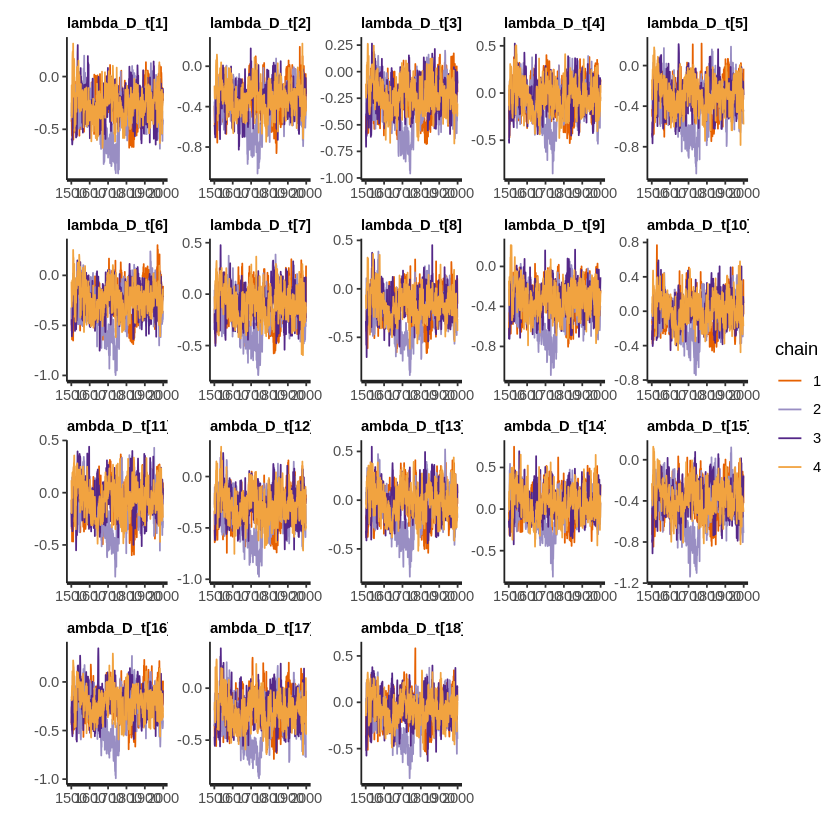

In [13]:
traceplot(fit, pars=c("lambda_D_t"))

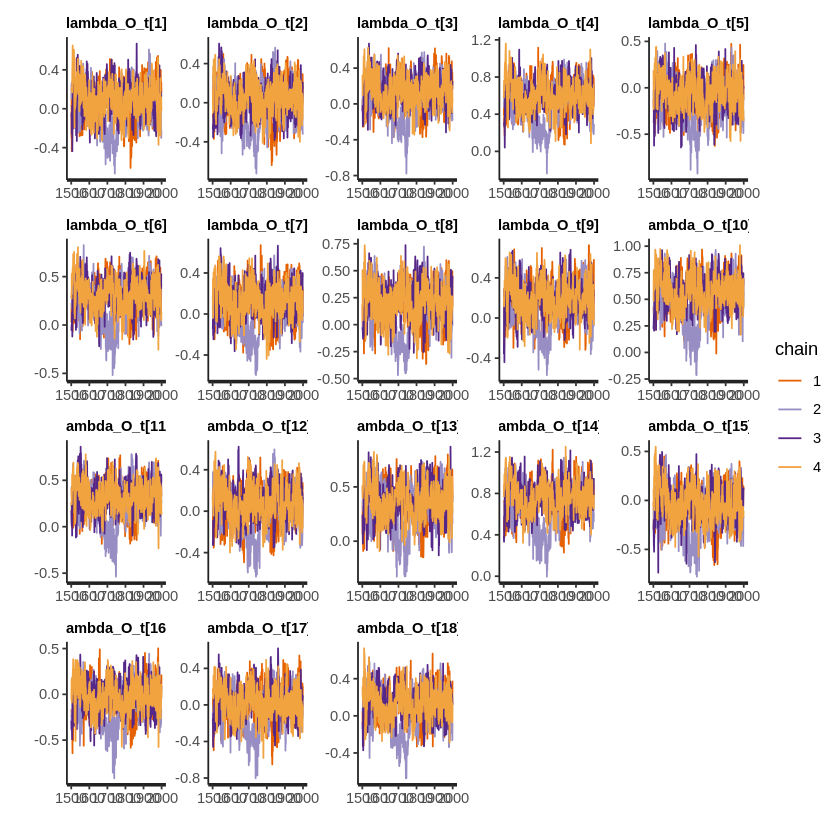

In [14]:
traceplot(fit, pars=c("lambda_O_t"))

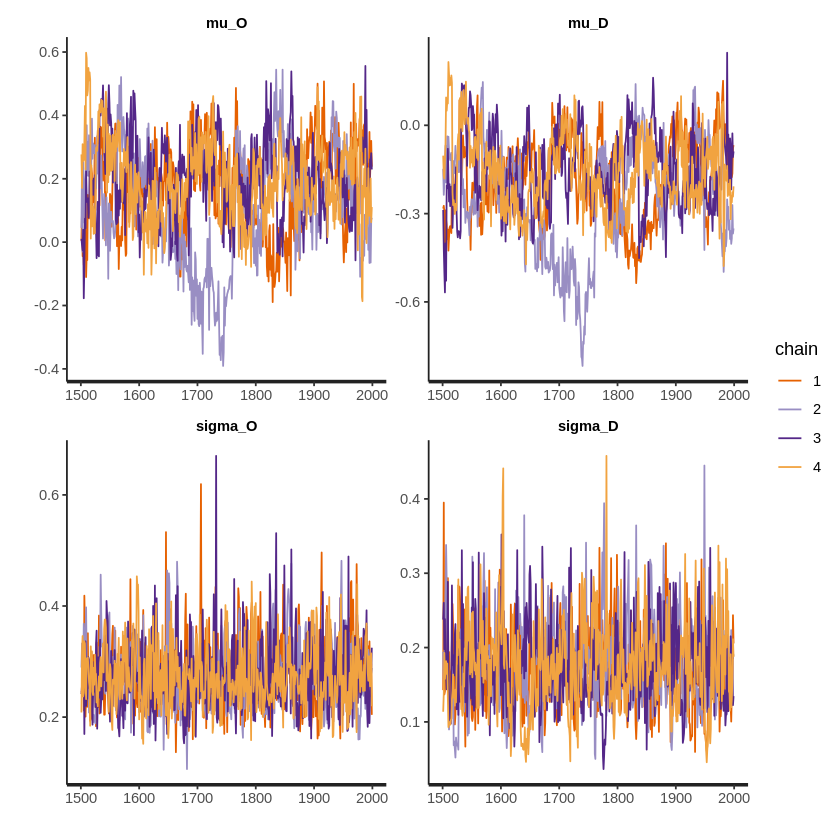

In [15]:
traceplot(fit, pars=c("mu_O", "mu_D", "sigma_O", "sigma_D"))

In [16]:
theme_posterior <- theme(
    axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")),
     lineend = "butt"),
    panel.background = element_rect(fill="transparent"),
    panel.border = element_rect(fill="transparent"),
    plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
    plot.margin = unit(c(1,1,1,1), "cm"),
  #
    axis.title.y = element_blank(), 
    axis.text.y = element_text(color = "grey20",
      size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
    xis.text.x = element_text(color="grey20",
      hjust = 1, vjust=1, size=8, angle = 50, face = "plain"),
    axis.ticks.y = element_blank()
)

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



ERROR: Error in eval(expr, envir, enclos): object 'theme_Posterior' not found


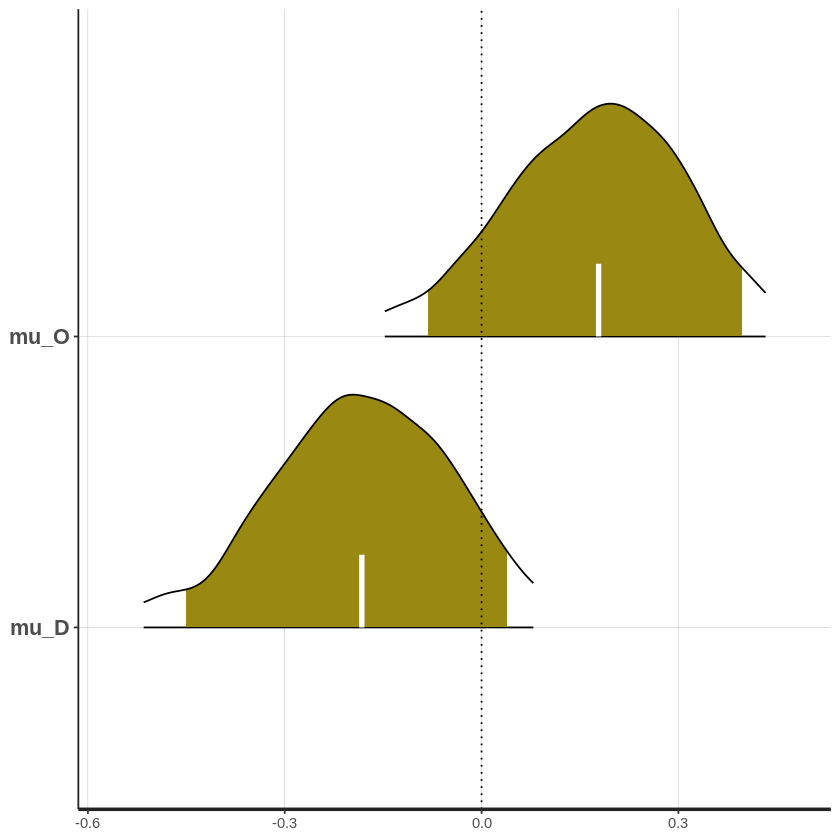

In [17]:
plot(fit,
     pars = names(fit)[c(1,2)],
     show_density = TRUE,
     fill_color = "#998811",
     est_color = "#ffffff",
     ci_level = 0.9, outer_level=0.95) +
     geom_vline(xintercept = 0, linetype = 3, size = 0.5)
     + theme_Posterior